In [5]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
import scipy.fftpack
from scipy import signal
import scipy.interpolate

In [6]:
import h5py

In [8]:
def get_pandas_dataframe_from_uncooperative_hdf5(filename, key='first_key'):
    f = h5py.File(filename,'r')
    all_keys = list(f.keys())
    
    if key == 'first_key':
        print('Dataset contains these keys: ')
        print(all_keys)
        key = all_keys[0]
        print('Using only the first key: ', key)
        
    data = f[key][()]
    dic = {}
    for column_label in data.dtype.fields.keys():
        dic.setdefault(column_label, data[column_label])
    df = pandas.DataFrame(dic)
    return df

In [12]:
try: # sometimes this works
    filename = 'motor_hotwire_100.hdf5'
    df = pandas.read_hdf(filename)
except: # if it fails, do it manually like with this approach
    filename = 'motor_hotwire_100.hdf5'
    df = get_pandas_dataframe_from_uncooperative_hdf5(filename)

In [13]:
df

,data_0,data_1,t_secs,t_nsecs,t
0,1000,100,1584407227,946222899,1.584407e+09
1,2000,100,1584407263,92530524,1.584407e+09
2,3000,100,1584407298,234671574,1.584407e+09
3,4000,100,1584407333,355639621,1.584407e+09
4,5000,100,1584407368,496399078,1.584407e+09
5,6000,100,1584407403,643656976,1.584407e+09
6,7000,100,1584407438,769678667,1.584407e+09
7,8000,100,1584407473,918239430,1.584407e+09
8,8290,100,1584407505,430641611,1.584408e+09
9,7290,100,1584407540,574605053,1.584408e+09


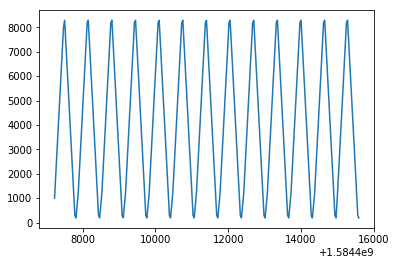

In [14]:
fig  = plt.figure()
ax = fig.add_subplot(111)

ax.plot(df.t, df.data_0)